In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter


# Get song genere data

In [2]:
# Read CSV File
tracks_info_df = pd.read_csv('data.csv')

# Read Processed song data

In [3]:
results_file = 'audio_features.pkl'

if os.path.exists(results_file):
    with open(results_file, 'rb') as file:
        saved_data = pickle.load(file)
    X = saved_data.get('X', [])
    y_labels = saved_data.get('y_labels', [])
    processed_files = set(saved_data.get('processed_files', []))
    print(f"Loaded {len(processed_files)} processed tracks")

Loaded 13309 processed tracks


# Preprocess

In [4]:
# --- Turn X into an np array ---
X = np.array(X)
print("shape of feature matrix X: ", X.shape)

shape of feature matrix X:  (13309, 2398)


In [5]:

# --- Replacing Sub-genres with the genres ---
genre_mapping = {
    'lo-fi beats': 'lo-fi',
    'chillwave': 'lo-fi',

    'nu metal': 'metal',
    'folk metal': 'metal',
    'heavy metal': 'metal',
    'metalcore': 'metal',
    'power metal': 'metal',
    'industrial metal': 'metal',
    'glam metal': 'metal',
    'melodic death metal': 'metal',
    'progressive metal': 'metal',
    'thrash metal': 'metal',
    'gothic metal': 'metal',
    'groove metal': 'metal',
    'death metal': 'metal',
    'alternative metal': 'metal',
    'black metal': 'metal',
    'speed metal': 'metal',

    'acid house': 'acid',
    'acid techno': 'acid',

    'afrobeat': 'afro',
    'afropop': 'afro',

    'art rock': 'rock',

    'britpop': 'alternative rock',
    
    'art pop': 'pop',
    'acoustic pop': 'pop',
    'bedroom pop': 'pop',
    'soft pop': 'pop', 
    'folk pop': 'pop',
    'norwegian pop': 'pop',
    'acoustic pop': 'pop',
    'dream pop': 'pop',
    'chamber pop': 'pop',
    'german pop': 'pop',
    'bedroom pop': 'pop',
    'city pop': 'pop',
    'dance pop': 'pop',
    'art pop': 'pop',
    'indie pop': 'pop',

    'alt country': 'country',
    'traditional country': 'country',

    'blues rock': 'blues',

    'brooklyn drill': 'drill',

    'gangster rap': 'rap',
    'memphis rap': 'rap',
    'rap rap': 'rock',
    'meme rap': 'rap',
    'punk rap': 'rap',
    'emo rap': 'rap',
    'jazz rap': 'rap',
    'melodic rap': 'rap',
    'cloud rap': 'rap',
    'k-rap': 'rap',
    'rage rap': 'rap',

    'edm trap': 'trap',
    'italian trap': 'trap',
    'dark trap': 'trap',

    'southern hip hop': 'hip hop',
    'west coast hip hop': 'hip hop',
    'east coast hip hop': 'hip hop',
    'finnish hip hop': 'hip hop',
    'german hip hop': 'hip hop',
    'underground hip hop': 'hip hop',
    'norwegian hip hop': 'hip hop',
    'experimental hip hop': 'hip hop',
    'alternative hip hop': 'hip hop',
    'latin hip hop': 'hip hop',

    'jazz blues': 'jazz',
    'vocal jazz': 'jazz',
    'french jazz': 'jazz',
    'free jazz': 'jazz',
    'soul jazz': 'jazz',
    'jazz fusion': 'jazz',
    'nu jazz': 'jazz',
    'jazz funk': 'jazz',
    'cool jazz': 'jazz',
    'jazz beats': 'jazz',
    'jazz house': 'jazz',
    'indie jazz': 'jazz',
    'smooth jazz': 'jazz',

    'melodic techno': 'techno',
    'minimal techno': 'techno',
    'hypertechno': 'techno',
    'hard techno': 'techno',
    'hardcore techno': 'techno',
    'dub techno': 'techno',

    'future house': 'house',
    'tech house': 'house',
    'bass house': 'house',
    'electro house': 'house',
    'tropical house': 'house',
    'french house': 'house',
    'melodic house': 'house',
    'organic house': 'house',
    'progressive house': 'house',
    'latin house': 'house',
    'deep house': 'house',
    'slap house': 'house',
    'chicago house': 'house'
    
} 

# remove: adult standards, americana?, anime?, baroque pop, bebop, big band, big beat, big room, bluegrass
# boom bap, bossa nova brazilian bass breakbeat breakcore 'calypso' 'canzone napoletana'
# 'celtic rock' 'chamber pop' 'chicha' "children's music"

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels]



In [ ]:
# If above is not run
y_labels_normalized = y_labels


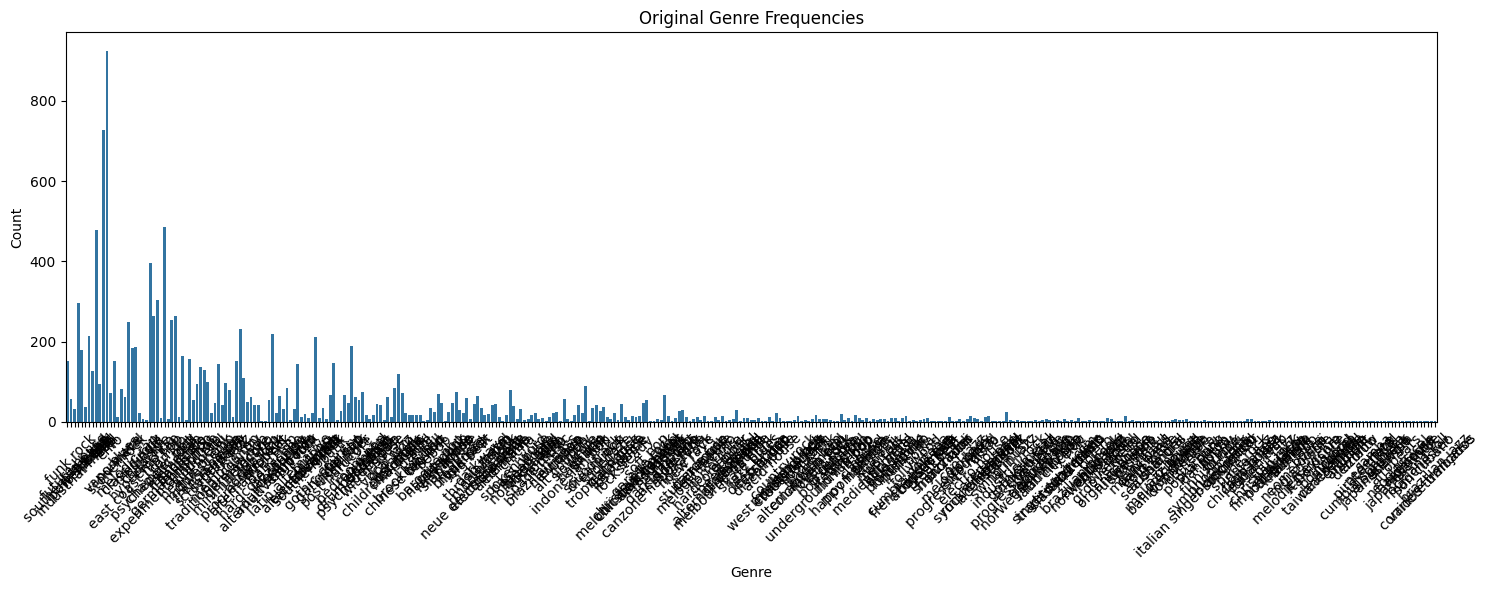

In [8]:
# --- Encoding the Genre Labels ---
#le = LabelEncoder()
#y = le.fit_transform(y_labels_normalized)
#print("Shape of label array y: ", y.shape)

y = y_labels_normalized


# -- Count and show the genres ---
freq_original = Counter(y_labels)

orig_genres = list(freq_original.keys())
orig_counts = list(freq_original.values())

fig, axs = plt.subplots(figsize=(15, 6))

sns.barplot(x=orig_genres, y=orig_counts, ax=axs)
axs.set_title("Original Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Remove all songs with genres which do not come up more than n times

Class counts: Counter({'rap': 2100, 'hip hop': 1239, 'lo-fi': 945, 'metal': 808, 'pop': 576, 'phonk': 479, 'jazz': 442, 'indie': 395, 'house': 280, 'psychedelic rock': 263, 'trap': 258, 'techno': 231, 'folk punk': 211, 'country': 188, 'classic rock': 185, 'flamenco': 165, 'rock': 161, 'christmas': 156, 'vaporwave': 152, 'punk': 146, 'synthwave': 144, 'midwest emo': 137, 'drift phonk': 128, 'hardstyle': 120, 'progressive rock': 108, 'ska': 94, 'g-funk': 88, 'alternative rock': 83, 'post-punk': 83, 'djent': 80, 'edm': 79, 'blues': 78, 'anime': 75, 'rap metal': 74, 'emo': 72, 'hardcore': 71, 'surf rock': 66, 'drum and bass': 61, 'folk rock': 60, 'funk rock': 56, 'psychedelic pop': 54, 'nerdcore': 49, 'schlager': 48, 'garage rock': 48, 'pop punk': 47, 'psytrance': 45, 'neue deutsche welle': 44, 'honky tonk': 43, 'dubstep': 43, 'reggae': 42, 'spoken word': 39, 'big band': 38, 'gothic country': 35, 'darkwave': 35, 'baroque pop': 34, 'soundtrack': 34, 'deathcore': 31, 'big room': 31, 'breakco

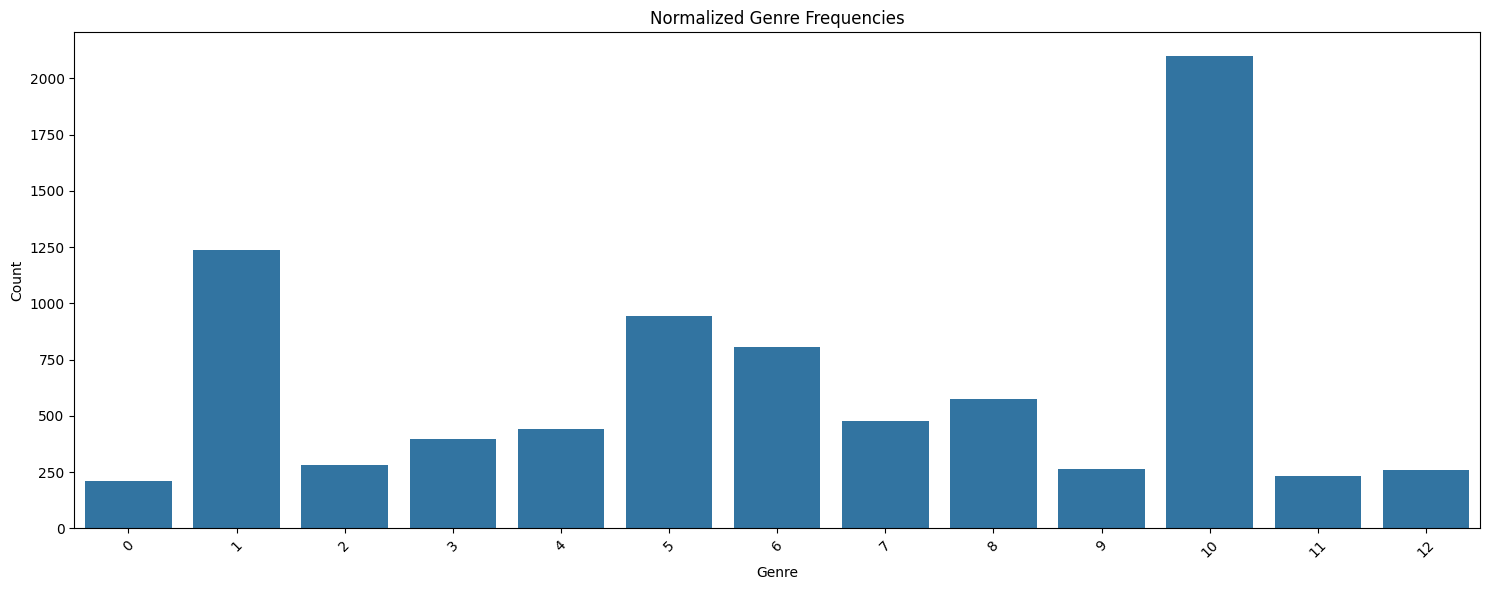

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Encoding/Standardizing X ---
# Remove compex object variables
if np.iscomplexobj(X):
    X = np.abs(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- Counting Labels ---
# Check class counts.
counter = Counter(y)
print("Class counts:", counter)

# Keep only classes with at least n samples. At least 2  or any other % 2 == 0 number
n = 200
classes_to_keep = {cls for cls, count in counter.items() if count >= n}
indices_to_keep = [i for i, label in enumerate(y) if label in classes_to_keep]

y = np.array(y)

# Filter your data.
X_filtered = X_scaled[indices_to_keep]
y_filtered = y[indices_to_keep]

le = LabelEncoder()
y_encoded = le.fit_transform(y_filtered)

freq_leftover = Counter(y_encoded)
leftover_genres = list(freq_leftover.keys())
leftover_counts = list(freq_leftover.values())

fig, axs = plt.subplots(figsize=(15, 6))

# Plot normalized label frequencies.
sns.barplot(x=leftover_genres, y=leftover_counts, ax=axs)
axs.set_title("Normalized Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Create a Test-Train split

In [11]:

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (6581, 2398) (6581,)
Test set shape: (1646, 2398) (1646,)


# Hyperparameter tuning

In [16]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assuming X_train, X_test, y_train, y_test are already defined
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

def build_model(hp):
    model = models.Sequential()
    
    # First layer: Let tuner choose activation function and number of units.
    activation_1 = hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])
    units_1 = hp.Int('units_1', min_value=16, max_value=256, step=32)
    model.add(layers.Dense(units_1, activation=activation_1, input_shape=(num_features,),
                           kernel_regularizer=regularizers.l2(0.01)))
    dropout_rate = hp.Float('dropout_rate', 0.0, 0.6, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    # Optional second layer: conditionally add if chosen by the tuner
    if hp.Boolean("second_layer"):
        activation_2 = hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])
        units_2 = hp.Int('units_2', min_value=16, max_value=256, step=32)
        model.add(layers.Dense(units_2, activation=activation_2,
                               kernel_regularizer=regularizers.l2(0.01)))
        # Optional dropout after second layer
        dropout_rate = hp.Float('dropout_rate', 0.0, 0.6, step=0.1)
        model.add(layers.Dropout(dropout_rate))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Hyperparameter for learning rate
    lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=100,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='activation_tuning'
)

# EarlyStopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Start hyperparameter search
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,  # Increase epochs for a more robust search if time allows
    callbacks=[early_stop]
)

# Retrieve best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
print("Best Hyperparameters:")
print(best_hps.values)

# Train the best model further if needed
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,  # Use best trial's epochs or default
    callbacks=[early_stop]
)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")



/home/agres/Services/predictify/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
sigmoid           |sigmoid           |activation_1
112               |112               |units_1
0.3               |0.3               |dropout_rate
True              |True              |second_layer
0.0001521         |0.0001521         |learning_rate

Epoch 1/40
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1616 - loss: 4.7352 - val_accuracy: 0.4787 - val_loss: 3.6358
Epoch 2/40
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3796 - loss: 3.6022 - val_accuracy: 0.5383 - val_loss: 2.9026
Epoch 3/40
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4130 - loss: 3.0125 - val_accuracy: 0.5583 - val_loss: 2.4668
Epoch 4/40
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4311 - loss: 2.6298 - val_accuracy: 0.5711 - val_loss: 2.1899
Epoch 5/40
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4646 - loss: 2.3623 - val_accuracy: 0.5808 - val_loss: 1.9972
Epoch 6/40
206/206 ━━━━━━━━━

KeyboardInterrupt: 

# Define ANN (not neccecary if done above)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import tensorflow as tf

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assuming X_train, X_test, y_train, y_test are already defined.
# Also assume that y are integer-encoded class labels.

num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

# Build a simple feedforward neural network.
model = Sequential([
    Dense(128, activation='relu', input_dim=num_features, kernel_regularizer=regularizers.l2(0.01)), 
    Dropout(0.1),
    Dense(112, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Use early stopping to prevent overfitting.
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model.
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_split=0.2)

# Evaluate on the test set.
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

best_model = model

2025-04-05 23:58:03.289842: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 23:58:03.292099: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 23:58:03.298353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743890283.310278 2626576 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743890283.314011 2626576 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743890283.323494 2626576 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/100


/home/agres/Services/predictify/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-05 23:58:04.597051: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3411 - loss: 4.5206 - val_accuracy: 0.5349 - val_loss: 3.0895
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5484 - loss: 2.8608 - val_accuracy: 0.5996 - val_loss: 2.3424
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6337 - loss: 2.1497 - val_accuracy: 0.6003 - val_loss: 1.9984
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6632 - loss: 1.7858 - val_accuracy: 0.6204 - val_loss: 1.8324
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6748 - loss: 1.5789 - val_accuracy: 0.6190 - val_loss: 1.7230
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6892 - loss: 1.4335 - val_accuracy: 0.6384 - val_loss: 1.6747
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 1.3490 - val_accuracy: 0.6039 - val_loss: 1.6982
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6972 - loss: 1.3584 - val_accuracy: 0.6139 - val_loss: 1.6

# Evaluation Charts

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


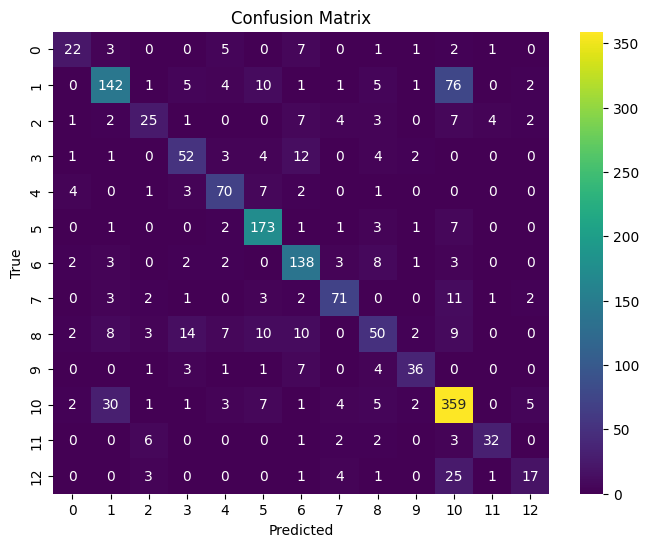

In [14]:
#Confusion Matrix
# Get predictions on the test set.
y_pred = np.argmax(best_model.predict(X_test), axis=1)

decoded_y_test = le.inverse_transform(y_test)
decoded_y_pred = le.inverse_transform(y_pred)

# Create confusion matrix.
cm = confusion_matrix(decoded_y_test, decoded_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

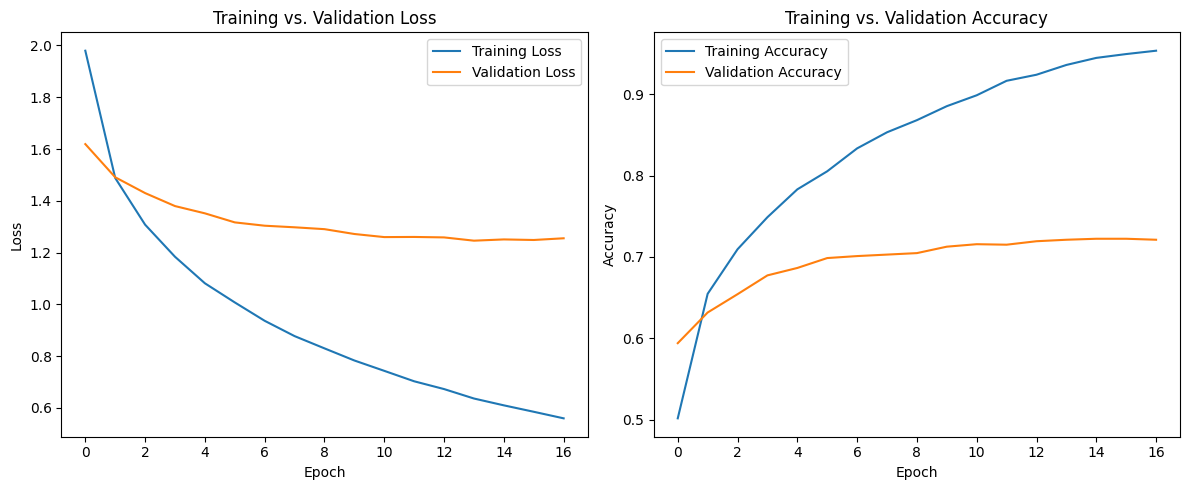

In [15]:
# Plot training vs. validation loss and accuracy.
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame for features. If X has many features, consider selecting a subset.
df_features = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

# Wrapper for the Keras model to work with sklearn's permutation_importance.
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        # Model is already trained.
        return self
    
    def predict(self, X):
        preds = self.model.predict(X)
        return np.argmax(preds, axis=1)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Wrap our trained model.
wrapper = KerasClassifierWrapper(best_model)

# Compute permutation importance on the test set.
result = permutation_importance(wrapper, X_test, y_test, n_repeats=10,
                                random_state=42, scoring='accuracy')
importance_means = result.importances_mean

# Plot the permutation importance.
plt.figure(figsize=(12, 6))
features = [f'feature_{i}' for i in range(X.shape[1])]
plt.bar(features, importance_means)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mean Importance')
plt.title('Permutation Feature Importance')
plt.show()

NameError: name 'best_model' is not defined